# Exercise 1

# Importing libraries

In [1]:
import os
import time
from glob import glob
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, RNN, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitjain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Total notebook run time: Start time
total_time_start = time.time()

In [3]:
# Utility functions :-
def compute_time_difference(time_start, time_end):
    """
    Function compute_time_difference: To compute time difference between the two provided timestamps
        @param time_start: Start time
        @param time_end: End time
    @return: time difference string
    """
    
    # Computing time difference
    time_diff = time_end - time_start
    
    # Initializing time string to store time in seconds
    time_str = str(round(time_diff, 3))+" seconds"
    
    # Checking if the seconds value amounts to more than a minute
    if 60 < time_diff < 3600:
        time_str = str(round(time_diff/60, 3))+" minutes"
    elif time_diff >= 3600:
        time_str = str(round(time_diff/3600, 3))+" hours"
        
    # Returning time difference string
    return time_str


#####  a. Create a table/dataframe which consolidates all the JSONs in single_label/train subfolder. Name it as df_train. Select only the columns abstract and categories from df_train

In [4]:
# start time 
time_start = time.time()

In [5]:
#Reading the training data and converting it to pandas dataframe
train_file_list = glob('./single_label/train/*.json')
df_train = pd.DataFrame()
dfs = []
# count= 0
for file in train_file_list:
    data = pd.read_json(file, lines=True)
    dfs.append(data)
#     count +=1
#     if count == 2000:
#         break
df_train = pd.concat(dfs, ignore_index=True)
df_train.head()

id                                              title  \
0  86166  Age at onset of asthma and allergen sensitizat...   
1  57896  Mediators of the association between parental ...   
2  66332  Identification of pathologically insignificant...   
3  30552  Salvinorin A analogs and other ?-opioid recept...   
4  56784  Treatment of neuromyelitis optica/neuromyeliti...   

                                            abstract       date  \
0  Epidemiological evidence indicates that the ag... 2014-05-09   
1  Parental severe mental illness (SMI) is associ... 2014-08-16   
2  Identification of men harbouring insignificant... 2014-05-14   
3  Acute activation of kappa-opioid receptors pro... 2014-02-03   
4  To review our experience using methotrexate as... 2014-03-20   

                                          categories  split  \
0                         Respiratory Tract Diseases  train   
1  Female Urogenital Diseases and Pregnancy Compl...  train   
2                           Male Urogenital Diseases  train   
3                       Chemically-Induced Disorders  train   
4                                       Eye Diseases  train   

                                           url  \
0  http://www.ncbi.nlm.nih.gov/pubmed/24809372   
1  http://www.ncbi.nlm.nih.gov/pubmed/25037304   
2  http://www.ncbi.nlm.nih.gov/pubmed/24722183   
3  http://www.ncbi.nlm.nih.gov/pubmed/24484985   
4  http://www.ncbi.nlm.nih.gov/pubmed/24628894   

                                         annotations  
0  [{'name': 'Allergen', 'weight': 0.865304, 'wik...  
1  [{'name': 'Attention deficit hyperactivity dis...  
2  [{'name': 'Disease', 'weight': 0.8041969999999...  
3  [{'name': 'Salvia divinorum', 'weight': 0.8949...  
4  [{'name': 'Plasmapheresis', 'weight': 0.913439...

In [6]:
df_train.head()

id                                              title  \
0  86166  Age at onset of asthma and allergen sensitizat...   
1  57896  Mediators of the association between parental ...   
2  66332  Identification of pathologically insignificant...   
3  30552  Salvinorin A analogs and other ?-opioid recept...   
4  56784  Treatment of neuromyelitis optica/neuromyeliti...   

                                            abstract       date  \
0  Epidemiological evidence indicates that the ag... 2014-05-09   
1  Parental severe mental illness (SMI) is associ... 2014-08-16   
2  Identification of men harbouring insignificant... 2014-05-14   
3  Acute activation of kappa-opioid receptors pro... 2014-02-03   
4  To review our experience using methotrexate as... 2014-03-20   

                                          categories  split  \
0                         Respiratory Tract Diseases  train   
1  Female Urogenital Diseases and Pregnancy Compl...  train   
2                           Male Urogenital Diseases  train   
3                       Chemically-Induced Disorders  train   
4                                       Eye Diseases  train   

                                           url  \
0  http://www.ncbi.nlm.nih.gov/pubmed/24809372   
1  http://www.ncbi.nlm.nih.gov/pubmed/25037304   
2  http://www.ncbi.nlm.nih.gov/pubmed/24722183   
3  http://www.ncbi.nlm.nih.gov/pubmed/24484985   
4  http://www.ncbi.nlm.nih.gov/pubmed/24628894   

                                         annotations  
0  [{'name': 'Allergen', 'weight': 0.865304, 'wik...  
1  [{'name': 'Attention deficit hyperactivity dis...  
2  [{'name': 'Disease', 'weight': 0.8041969999999...  
3  [{'name': 'Salvia divinorum', 'weight': 0.8949...  
4  [{'name': 'Plasmapheresis', 'weight': 0.913439...

In [7]:
df_train.tail()

id                                              title  \
43967  83035  CD4(-)CD8(-) T-cells in primary Sjögren's synd...   
43968  78587  Longitudinal results of intratympanic injectio...   
43969   7960  Evaluation of Metarhizium anisopliae for the c...   
43970  54112  The expression of dual oxidase, thyroid peroxi...   
43971  29422  The tridimensional personality of male heroin ...   

                                                abstract       date  \
43967  Growing evidence suggests that IL-17-producing... 2014-05-26   
43968  To assess the longitudinal curative effect and... 2014-03-13   
43969  Four isolates of the entomopathogenic fungus M... 2014-05-13   
43970  Hashimoto's thyroiditis (HT) and Graves' disea... 2014-05-07   
43971  It was our assumption that male heroin users h... 2014-06-14   

                          categories  split  \
43967        Stomatognathic Diseases  train   
43968  Otorhinolaryngologic Diseases  train   
43969                Animal Diseases  train   
43970      Endocrine System Diseases  train   
43971   Chemically-Induced Disorders  train   

                                               url  \
43967  http://www.ncbi.nlm.nih.gov/pubmed/24461537   
43968  http://www.ncbi.nlm.nih.gov/pubmed/24622016   
43969  http://www.ncbi.nlm.nih.gov/pubmed/24820575   
43970  http://www.ncbi.nlm.nih.gov/pubmed/24476075   
43971  http://www.ncbi.nlm.nih.gov/pubmed/24666715   

                                             annotations  
43967  [{'name': 'Immunofluorescence', 'weight': 0.86...  
43968  [{'name': 'Sodium chloride', 'weight': 0.92899...  
43969  [{'name': 'Fly', 'weight': 0.866583, 'wikipedi...  
43970  [{'name': 'Colloid', 'weight': 0.898868, 'wiki...  
43971  [{'name': 'Fatigue (medical)', 'weight': 0.501...

In [8]:
df_train.shape

(43972, 8)

## Exercise1 solution

In [9]:
df_train = df_train[['abstract', 'categories']]

In [10]:
df_train.head()

abstract  \
0  Epidemiological evidence indicates that the ag...   
1  Parental severe mental illness (SMI) is associ...   
2  Identification of men harbouring insignificant...   
3  Acute activation of kappa-opioid receptors pro...   
4  To review our experience using methotrexate as...   

                                          categories  
0                         Respiratory Tract Diseases  
1  Female Urogenital Diseases and Pregnancy Compl...  
2                           Male Urogenital Diseases  
3                       Chemically-Induced Disorders  
4                                       Eye Diseases

In [11]:
df_train.tail()

abstract  \
43967  Growing evidence suggests that IL-17-producing...   
43968  To assess the longitudinal curative effect and...   
43969  Four isolates of the entomopathogenic fungus M...   
43970  Hashimoto's thyroiditis (HT) and Graves' disea...   
43971  It was our assumption that male heroin users h...   

                          categories  
43967        Stomatognathic Diseases  
43968  Otorhinolaryngologic Diseases  
43969                Animal Diseases  
43970      Endocrine System Diseases  
43971   Chemically-Induced Disorders

In [12]:
df_train.shape

(43972, 2)

In [13]:
# End time
time_end = time.time()
print("The time taken to load input train data:", compute_time_difference(time_start, time_end))

The time taken to load input train data: 4.924 minutes


##### b. Create a table/dataframe which consolidates all the JSONs in single_label/test subfolder. Name it as df_test. Select only the columns abstract and categories from df_test

In [14]:
# start time 
time_start = time.time()

In [15]:
#Reading the testing data and converting it to pandas dataframe
test_file_list = glob('./single_label/test/*.json')
df_test = pd.DataFrame()
dfs_test = []
# count = 0
for file_test in test_file_list:
    data_test = pd.read_json(file_test, lines=True)
    dfs_test.append(data_test)
#     count +=1
#     if count == 500:
#         break

df_test = pd.concat(dfs_test, ignore_index=True)
df_test.head()

id                                              title  \
0  22996  Clinical features of adults with seven-valent-...   
1  89769  Sensitivity of physical examination versus art...   
2  53586  Role of calpain-10 in the development of diabe...   
3  63130  Pathology-confirmed granuloma mimicking liver ...   
4  35750  Omega-3 fatty acid supplementation during preg...   

                                            abstract       date  \
0  Despite the reduction in adult invasive pneumo... 2014-03-05   
1  The purpose of this study was to examine the a... 2014-03-31   
2  Calpain activity has been implicated in severa... 2014-03-05   
3  For patients with breast cancer, obtaining tis... 2014-03-24   
4  Prenatal consumption of omega-3 fatty acids ca... 2014-08-06   

                                          categories split  \
0                   Bacterial Infections and Mycoses  test   
1                                Wounds and Injuries  test   
2                          Endocrine System Diseases  test   
3                       Hemic and Lymphatic Diseases  test   
4  Congenital Hereditary and Neonatal Diseases an...  test   

                                           url  \
0  http://www.ncbi.nlm.nih.gov/pubmed/24508039   
1  http://www.ncbi.nlm.nih.gov/pubmed/24683653   
2  http://www.ncbi.nlm.nih.gov/pubmed/24508288   
3  http://www.ncbi.nlm.nih.gov/pubmed/24474453   
4  http://www.ncbi.nlm.nih.gov/pubmed/24626819   

                                         annotations  
0  [{'name': 'World Health Organization', 'weight...  
1  [{'name': 'Physical examination', 'weight': 0....  
2  [{'name': 'Exocytosis', 'weight': 0.8801019999...  
3  [{'name': 'X-ray computed tomography', 'weight...  
4  [{'name': 'Docosahexaenoic acid', 'weight': 0....

In [16]:
df_test.tail()

id                                              title  \
10868  21442  Methicillin-resistant Staphylococcus aureus tr...   
10869  81458  Accuracy of impressions of multiple implants i...   
10870  62889  Primary distal femur T-cell lymphoma after all...   
10871  45703  A comparison of total versus partial omentecto...   
10872  63261  Scutellaria extract decreases the proportion o...   

                                                abstract       date  \
10868  To characterize the epidemiology of methicilli... 2014-03-07   
10869  Because there is a paucity of clear-cut eviden... 2014-07-18   
10870  Post-transplant lymphoproliferative disorders ... 2014-03-20   
10871  Minimally invasive surgery has been slowly int... 2014-04-01   
10872  Scutellaria is one of the most popular traditi... 2014-01-27   

                             categories split  \
10868  Bacterial Infections and Mycoses  test   
10869           Stomatognathic Diseases  test   
10870      Hemic and Lymphatic Diseases  test   
10871         Digestive System Diseases  test   
10872      Hemic and Lymphatic Diseases  test   

                                               url  \
10868  http://www.ncbi.nlm.nih.gov/pubmed/24602947   
10869  http://www.ncbi.nlm.nih.gov/pubmed/25032767   
10870  http://www.ncbi.nlm.nih.gov/pubmed/24501166   
10871  http://www.ncbi.nlm.nih.gov/pubmed/24669875   
10872  http://www.ncbi.nlm.nih.gov/pubmed/24460272   

                                             annotations  
10868  [{'name': 'Methicillin-resistant Staphylococcu...  
10869  [{'name': 'Systematic review', 'weight': 0.874...  
10870  [{'name': 'Hematopoietic stem cell', 'weight':...  
10871  [{'name': 'Surgery', 'weight': 0.468236, 'wiki...  
10872  [{'name': 'Multiple myeloma', 'weight': 0.8990...

In [17]:
df_test.shape

(10873, 8)

## Exercise1 solution

In [18]:
df_test = df_test[['abstract', 'categories']]

In [19]:
df_test.head()

abstract  \
0  Despite the reduction in adult invasive pneumo...   
1  The purpose of this study was to examine the a...   
2  Calpain activity has been implicated in severa...   
3  For patients with breast cancer, obtaining tis...   
4  Prenatal consumption of omega-3 fatty acids ca...   

                                          categories  
0                   Bacterial Infections and Mycoses  
1                                Wounds and Injuries  
2                          Endocrine System Diseases  
3                       Hemic and Lymphatic Diseases  
4  Congenital Hereditary and Neonatal Diseases an...

In [20]:
df_test.tail()

abstract  \
10868  To characterize the epidemiology of methicilli...   
10869  Because there is a paucity of clear-cut eviden...   
10870  Post-transplant lymphoproliferative disorders ...   
10871  Minimally invasive surgery has been slowly int...   
10872  Scutellaria is one of the most popular traditi...   

                             categories  
10868  Bacterial Infections and Mycoses  
10869           Stomatognathic Diseases  
10870      Hemic and Lymphatic Diseases  
10871         Digestive System Diseases  
10872      Hemic and Lymphatic Diseases

In [21]:
df_test.shape

(10873, 2)

In [22]:
# End time
time_end = time.time()
print("The time taken to load input test data:", compute_time_difference(time_start, time_end))

The time taken to load input test data: 1.129 minutes


# Exercise 2

##### a. What are the top 3 insights generated while doing the data analysis on train set (df_train)?

##### b. What are the top 3 data challenges you observe on train set?

In [23]:
#check missing values
print('Total missing value in abstract of df_train:', df_train["abstract"].isna().sum())
print('Total missing value in categories of df_train:', df_train["categories"].isna().sum())
print('Total missing value in abstract of df_test:', df_test["abstract"].isna().sum())
print('Total missing value in categories of df_test:', df_test["categories"].isna().sum())

Total missing value in abstract of df_train: 0
Total missing value in categories of df_train: 0
Total missing value in abstract of df_test: 0
Total missing value in categories of df_test: 0


##### Check Training data and test data proportion to understand whether, we have enough data for training the model and to understand the behaviour of the model on each of these classes.

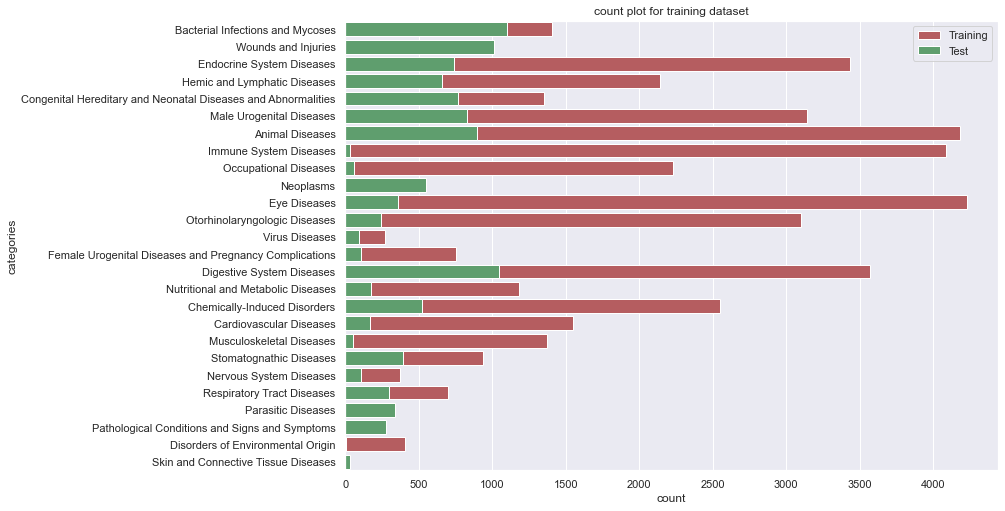

In [24]:
#Check Training data nnd test data proportion
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y="categories", data=df_train, label='Training', color='r')
sns.countplot(y="categories", data=df_test, label='Test',color='g')
plt.title('count plot for training dataset')
plt.legend()
plt.show()

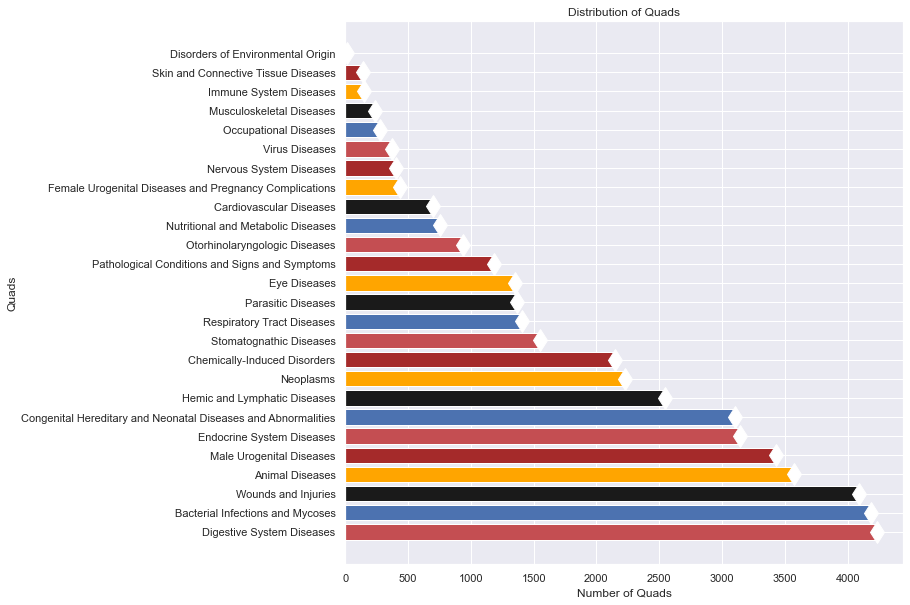

In [25]:
#data prep
b=df_train['categories'].value_counts()
d=pd.DataFrame({'categories':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
#plot
plt.rcParams.update({'font.size': 38})
fig, ax = plt.subplots(figsize=(10,10))
colors=['r', 'b', 'k', 'orange', 'brown']
ax.plot(sort_df.Statistics, d.categories,"d", color='white', markersize=16)
ax.barh(sort_df.categories, width=sort_df.Statistics, color=colors)
plt.xlabel("Number of Quads")
plt.ylabel("Quads")
plt.title("Distribution of Quads");

<AxesSubplot:>

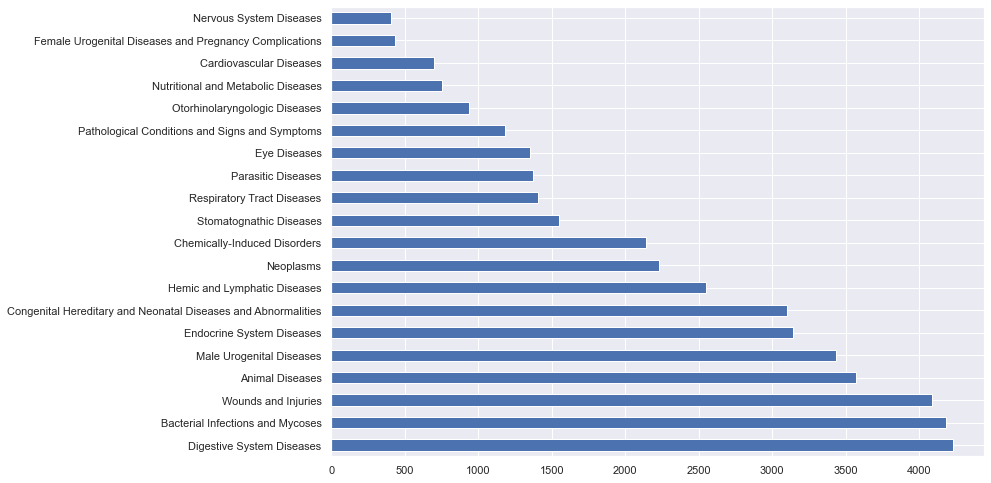

In [26]:
df_train['categories'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

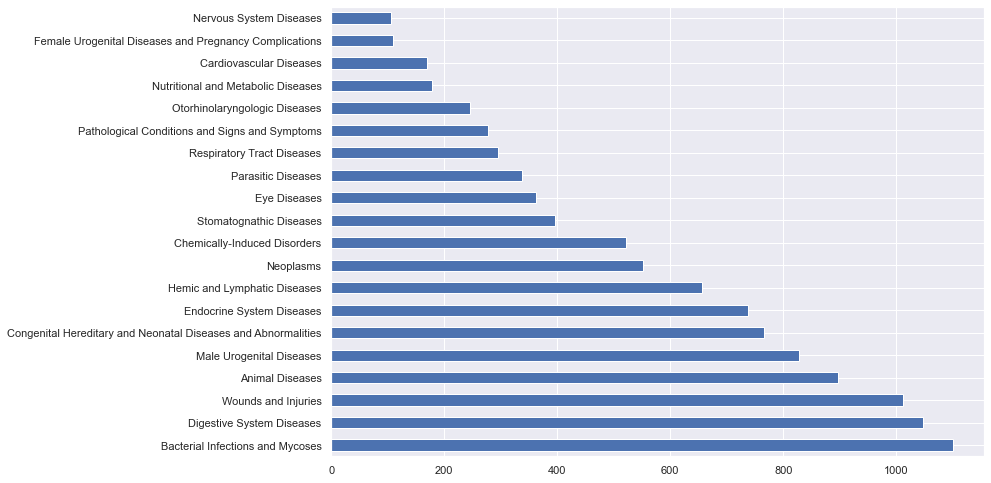

In [27]:
df_test['categories'].value_counts()[:20].plot(kind='barh')

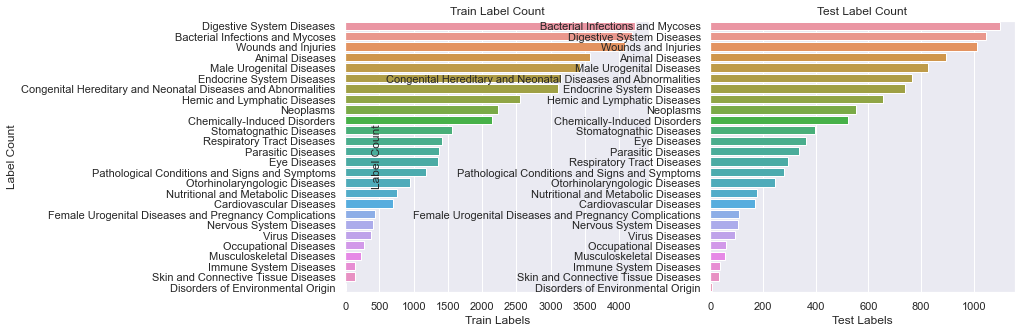

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', df_train['categories']), ('Test', df_test['categories'])]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], y=data.index, x=data.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

In [29]:
df_train_value_counts = df_train['categories'].value_counts().rename_axis('categories').reset_index(name='counts')
# print(df_train_value_counts)

df_test_value_counts = df_test['categories'].value_counts().rename_axis('categories').reset_index(name='counts')
# df_test_value_counts

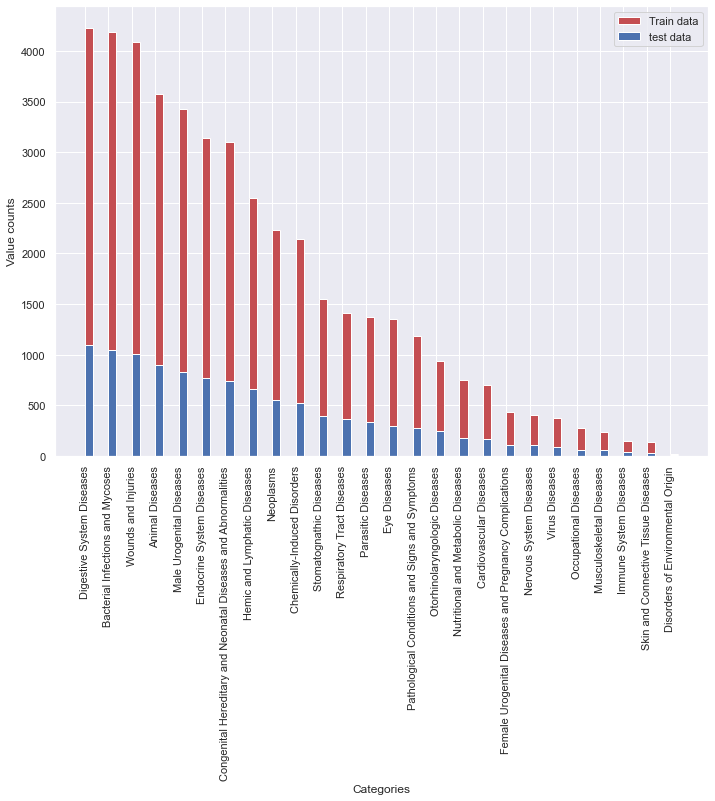

In [30]:
fig, ax = plt.subplots()

index_train = np.arange(len(df_train_value_counts['categories']))
index_test = np.arange(len(df_test_value_counts['categories']))
bar_width = 0.35
opacity = 0.8

ax.bar(index_train, df_train_value_counts['counts'], color='r', align='edge',width = bar_width, label = 'Train data')
ax.bar(index_test, df_test_value_counts['counts'], color='b', align='edge', width = bar_width, label = 'test data')

# Assign the tick labels
ax.set_xticks(index_train)
ax.set_xticklabels(df_train_value_counts['categories'], rotation=90)

plt.xlabel('Categories')
plt.ylabel('Value counts')
plt.legend()
plt.show()

<AxesSubplot:ylabel='categories'>

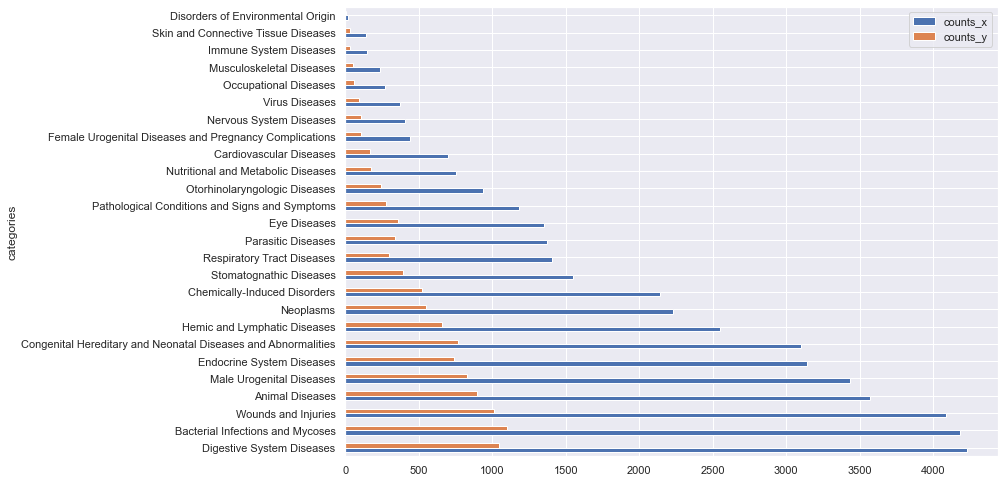

In [31]:
df_c = pd.merge(df_train_value_counts, df_test_value_counts, on='categories')
df_c.plot.barh(x='categories')

The above plots show a comparison between train and test dataframes, The distribution of categories in both train and test sets.

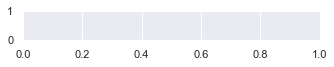

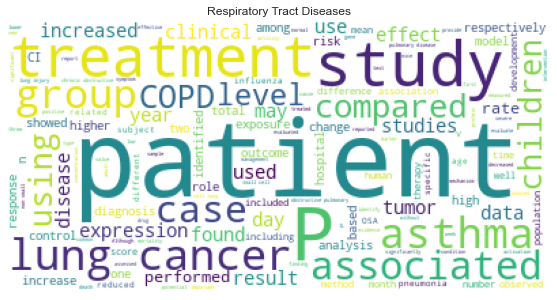

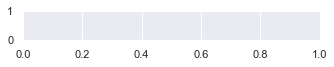

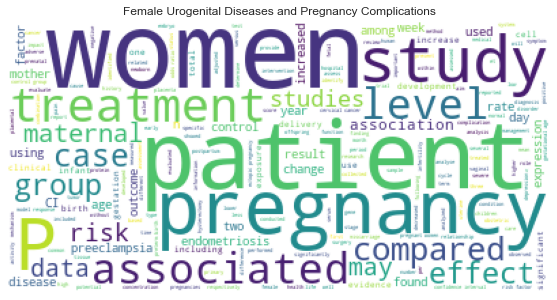

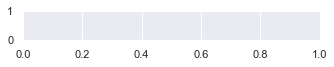

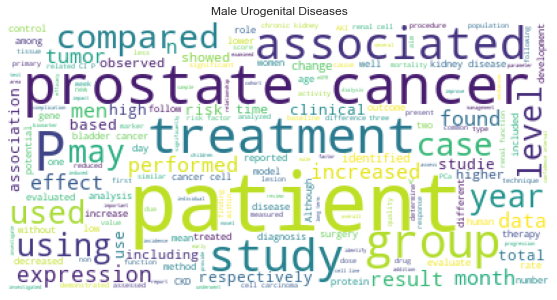

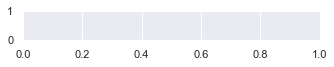

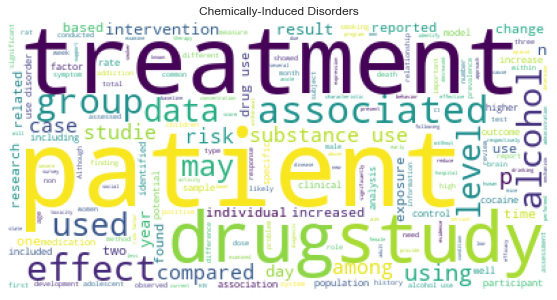

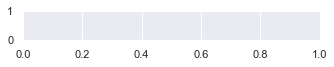

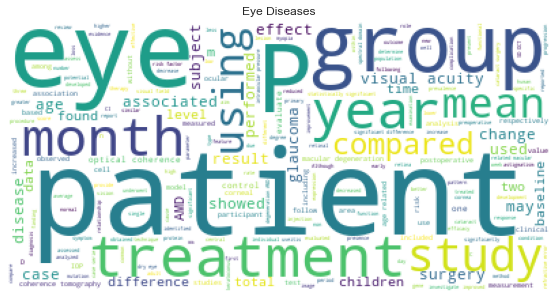

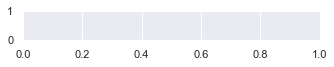

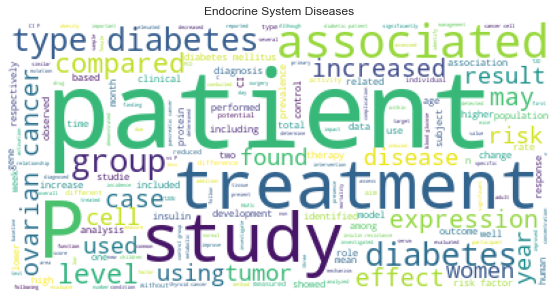

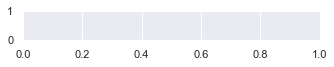

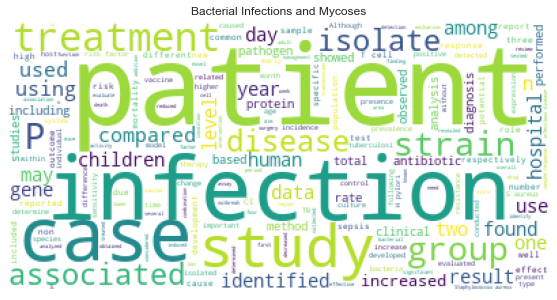

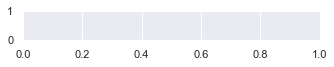

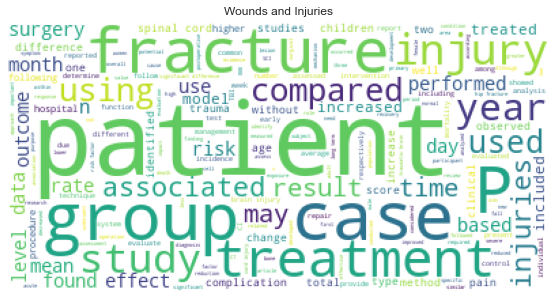

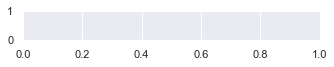

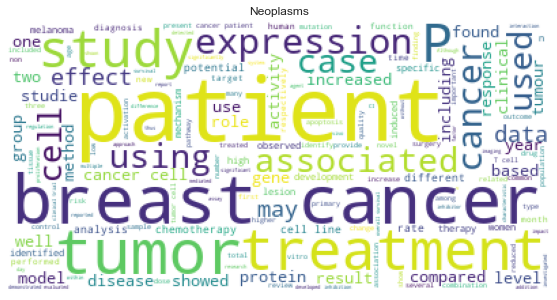

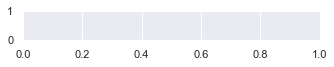

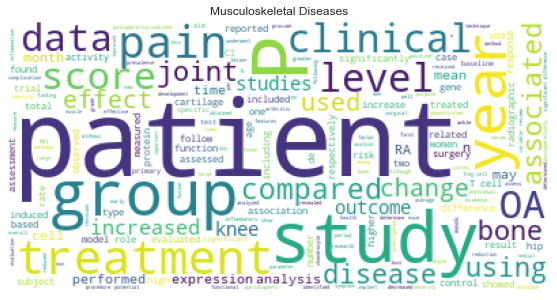

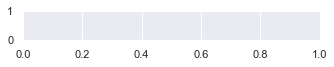

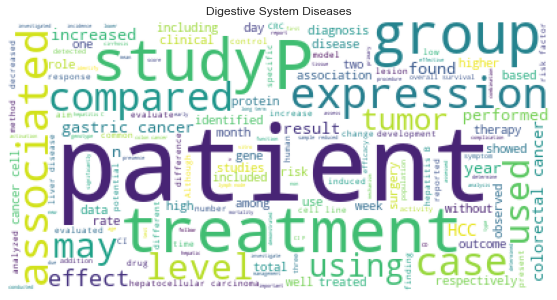

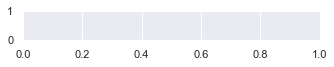

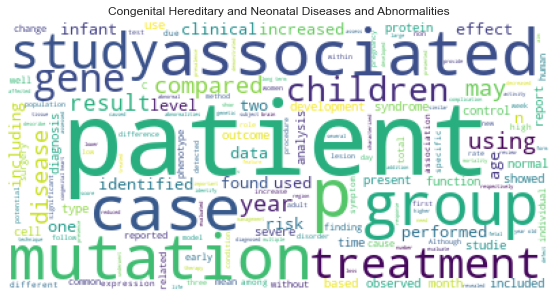

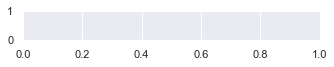

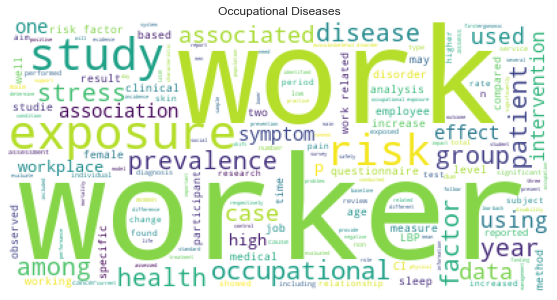

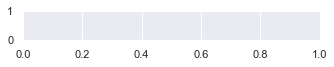

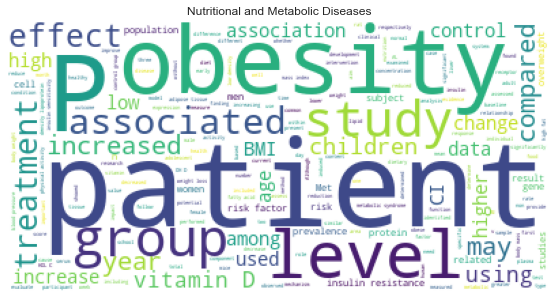

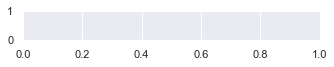

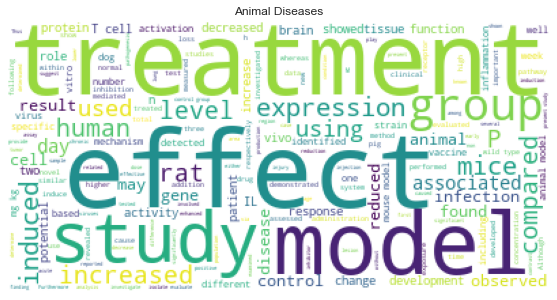

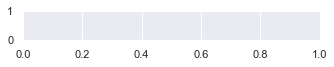

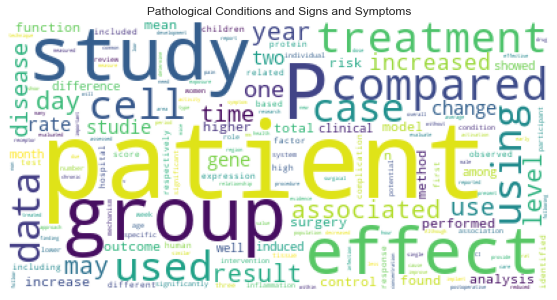

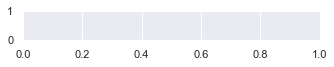

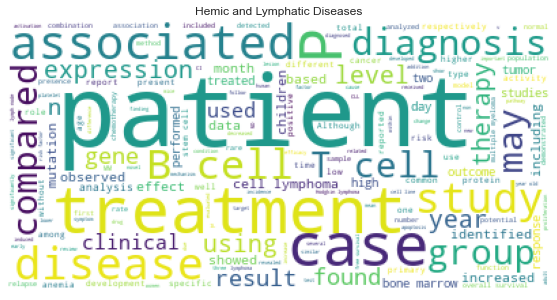

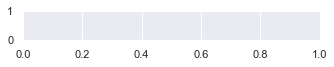

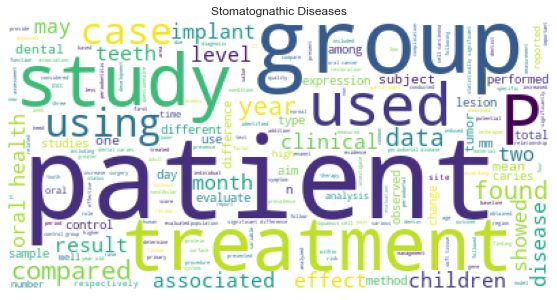

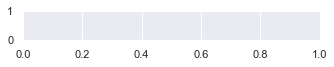

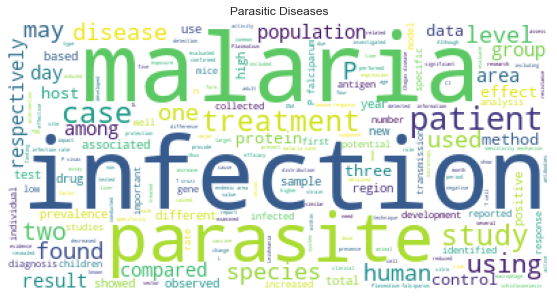

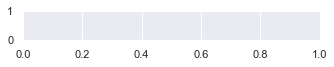

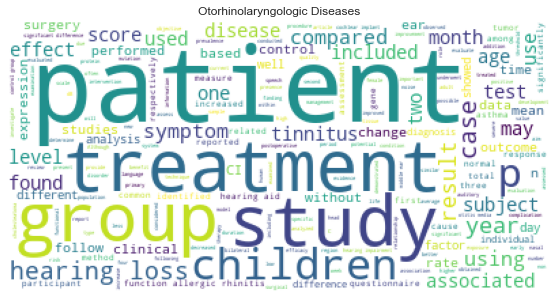

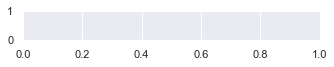

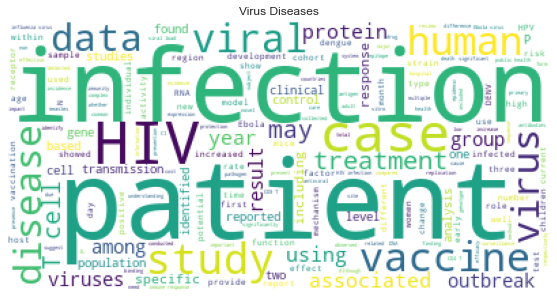

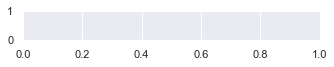

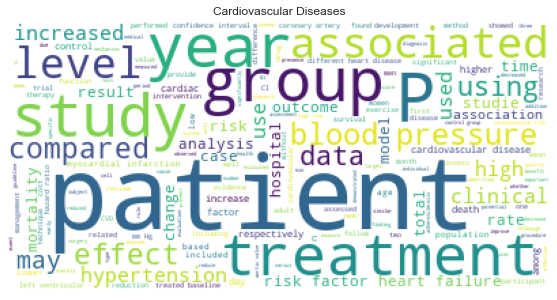

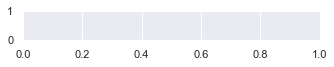

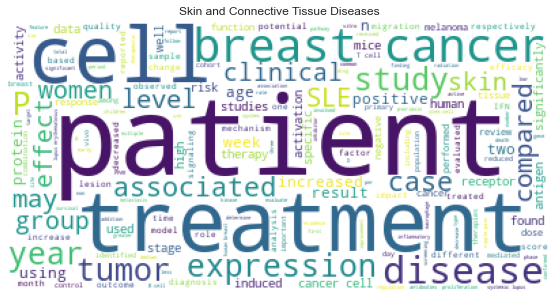

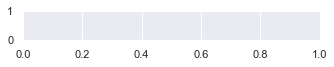

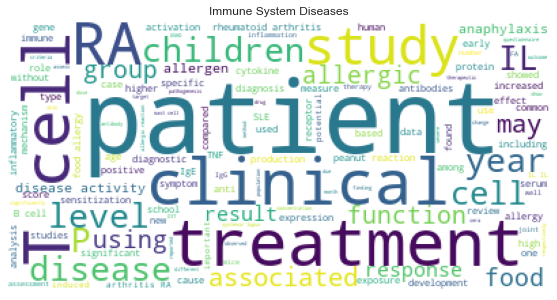

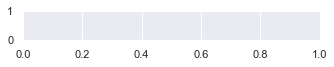

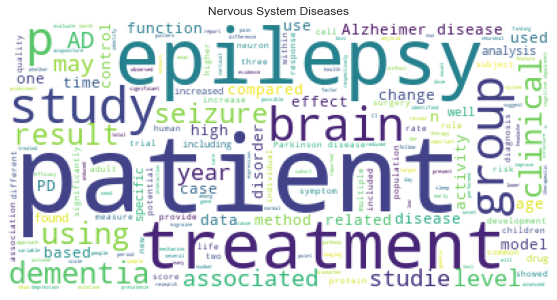

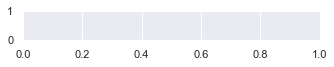

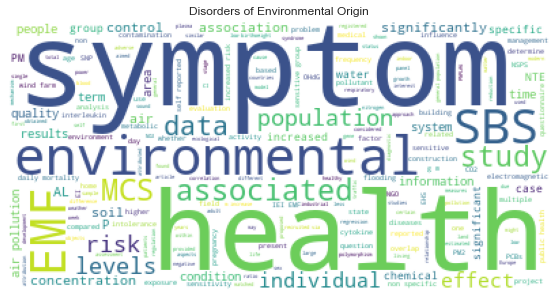

In [32]:
#World cloud plot the see the different word frequecy for each category,
# to understand the most common words in all of these classes.
for i, category in enumerate(df_train['categories'].unique()):
    text = str(list(df_train[df_train['categories']==category]['abstract']))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white"
                      ).generate(text)
    plt.subplot(13,2,i+1)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(category)
    plt.show()

In [33]:
#check n-gram for each category, to take a decision whether to drop/remove the stopwords list or not!
Ngrams = ngrams(str(list(df_train[df_train['categories']=='Digestive System Diseases']['abstract'])).split(), 1)
fdist = FreqDist(Ngrams)
ngram_list = []
freq = []

for k,v in fdist.items():
    ngram_list.append(k)
    freq.append(v)
    
ngram_list = pd.DataFrame(ngram_list)
freq = pd.DataFrame(freq)
freq = freq.rename(columns={0: "frequency"})
Ngram = pd.concat([ngram_list, freq], axis=1, sort=False)
result_ngram = Ngram.sort_values(by=['frequency'], ascending=False)
result_ngram

0  frequency
89              of      36339
60             and      34182
69             the      32855
9               in      22636
50              to      14265
...            ...        ...
42663         CMIA          1
42665  imunoassay,          1
42667        i2000          1
42668    (HBsAg)),          1
85760           ']          1

[85761 rows x 2 columns]

Most common words are the stopwords, so dropping them would make more sense in the data

In [34]:
#Data cleaning process
def data_cleaning(text):  
    stop = stopwords
    stop = stop.union(['patient','use','study','treatment', 'cell', 'expression', 'clinical']) 
    lemma = WordNetLemmatizer()   
    stop_free = " ".join([i for i in str(text).lower().split() if i not in stop])
    underscore = re.sub('_',' ',stop_free)                                             #Replace underscore with space
    #punc_free = re.sub('[%s]' % re.escape(text +r'“'+'”'+'’'+"'"), ' ', underscore) 
    num_free = re.sub('[^a-z ]','',str(underscore))
    normalized = " ".join(lemma.lemmatize(word) for word in num_free.split())
    short_word = ' '.join(word for word in normalized.split() if len(word)>1)
    long_word = ' '.join(word for word in short_word.split() if len(word)<15)
    return long_word
data_clean = [lambda x: data_cleaning(x)]

In [35]:
#Clean Training and test data
df_train['abstract'] = df_train['abstract'].apply(data_clean)
df_test['abstract'] = df_test['abstract'].apply(data_clean)

# Exercise 2 solution

##### a. What are the top 3 insights generated while doing the data analysis on train set (df_train)?

1) There are few words for each category that are used in many abstracts, Ex: Resporatory tract diseases has words like (Patient, asthma, lung, treatment), Endocrime system diseases has words like (Diabetes, type diabeters, risk), Wounds and injuries has words like (Fracture, trauma), Neoplasms have words like (Cancer, breats cancer, cell, tumoir, protein, tissue),  Digestive System Diseases is having words like (Gastric), Animal diseases is having animal names(rat) etc. These words will help model to predict label and will treated as very good features determining the category to which they belong.

2) There are few worlds like ('patient','use','study','treatment', 'cell', 'expression', 'clinical') which are coming frequenctly in all categories. We can take these words as additional stopwords so that the model does not get confuse or reduce its accuracy.

3)There are no any missing value in abstract and categories columns

##### b. What are the top 3 data challenges you observe on train set?

1) Data is highly imbalanced for different categories

2) Training data and test data are not in good proportion. eg- Test data for Digestive System Diseases category is more than training data of same category. We see class imbalance as a problem with this dataset, We coul use upsampling or downsampling technique for class imbalance.

3) There are many words which are coming frequently in different categories which create noise and decrease model accuracy. Like the words we plan to add in the stopwords list

# Exercise 3

##### a. Pick your favourite machine learning algorithm to train a multi-class text classifier using the train set (df_train). The classifier should be able to consider the abstract as input and predict any one of the 26 disease categories

In [36]:
#Creating Document vector Structure
vectorizer = TfidfVectorizer(max_features=10000)

In [37]:
data_cv = vectorizer.fit_transform(df_train['abstract'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names())
data_dtm.index = df_train.index
data_dtm

aa  aaa  aav   ab  abbreviated  abc  abca  abcb  abcc  abcg  ...  \
0      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
1      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
2      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
3      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
4      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
...    ...  ...  ...  ...          ...  ...   ...   ...   ...   ...  ...   
43967  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
43968  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
43969  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
43970  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   
43971  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0   0.0  ...   

       zero  zinc  zip   zn  zolpidem  zone  zoonotic  zoster  zscore   zu  
0       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
1       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
2       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
3       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
4       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
...     ...   ...  ...  ...       ...   ...       ...     ...     ...  ...  
43967   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
43968   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
43969   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
43970   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
43971   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  

[43972 rows x 10000 columns]

In [38]:
test_cv = vectorizer.transform(df_test['abstract'])
test_dtm = pd.DataFrame(test_cv.toarray(), columns=vectorizer.get_feature_names())
test_dtm.index = df_test.index
test_dtm

aa  aaa  aav   ab  abbreviated  abc  abca  abcb  abcc      abcg  ...  \
0      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
1      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
2      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
3      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
4      0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
...    ...  ...  ...  ...          ...  ...   ...   ...   ...       ...  ...   
10868  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
10869  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
10870  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
10871  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.000000  ...   
10872  0.0  0.0  0.0  0.0          0.0  0.0   0.0   0.0   0.0  0.301369  ...   

       zero  zinc  zip   zn  zolpidem  zone  zoonotic  zoster  zscore   zu  
0       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
1       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
2       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
3       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
4       0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
...     ...   ...  ...  ...       ...   ...       ...     ...     ...  ...  
10868   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
10869   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
10870   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
10871   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  
10872   0.0   0.0  0.0  0.0       0.0   0.0       0.0     0.0     0.0  0.0  

[10873 rows x 10000 columns]

In [39]:
lr = LogisticRegression()
mnb = MultinomialNB()
rf = RandomForestClassifier()
lsvc = LinearSVC()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()


#models = [('LogisticRegression', lr), ('multinomialnv',mnb),('Randomforest', rf), ('LinearSVC',lsvc),('xgboost',xgb), ('DecisionTree',dt), ]
models = [('LinearSVC',lsvc)]

for name, model in models:
    model.fit(data_dtm, df_train['categories'])
    y_pred = model.predict(test_dtm)
    print(f"Accuracy for model {name} : {accuracy_score(df_test['categories'],y_pred)}")

Accuracy for model LinearSVC : 0.7497470799227444


In [40]:
print(classification_report(df_test['categories'], y_pred))

                                                               precision    recall  f1-score   support

                                              Animal Diseases       0.66      0.68      0.67       896
                             Bacterial Infections and Mycoses       0.80      0.82      0.81      1100
                                      Cardiovascular Diseases       0.55      0.51      0.53       170
                                 Chemically-Induced Disorders       0.76      0.82      0.79       521
Congenital Hereditary and Neonatal Diseases and Abnormalities       0.68      0.71      0.70       766
                                    Digestive System Diseases       0.80      0.84      0.82      1047
                            Disorders of Environmental Origin       0.00      0.00      0.00         5
                                    Endocrine System Diseases       0.83      0.81      0.82       738
                                                 Eye Diseases       0.82

In [41]:
#Predict category after taking abstract as a string.
def predict_diseases(text):
    text = [text]
    x = vectorizer.transform(text)
    result = model.predict(x)
    return result

In [42]:
text_data = df_test['abstract'][1]
print(f'input text: {text_data}')
print(f'predicted category: {predict_diseases(text_data)}')

input text: purpose examine accuracy physical examination detection subscapularis tendon tear compare gold standard arthroscopy determine whether examination reliably predict presence subscapularis tendon tear retrospective analysis patient shoulder underwent arthroscopic subscapularis tendon repair september april positive finding combination belly press liftoff bear hug test constituted positive physical examination result positive finding physical examination patient sensitivity physical examination whole literature shown belly press bear hug liftoff test specific subscapularis tendon author knowledge first evaluate sensitivity separate test composite knowledge regarding sensitivity physical examination composite lead practitioner implement component even test negative finding thus promoting thorough physical examination unrepaired subscapularis tendon tear result poor outcome repair rotator cuff tendon complete physical examination beneficial patient shoulder pathology author concl

##### b. Report key metrics on your test set (df_test) and explain your observations

 I have chosen accuracy score and f1 score to evaluate my model. As we can see from above classification report, we are getting an overall accuracy of 75%, we are getting upto 87 % accuracy for category like Parasitic Diseases but at the same time we are getting poor accuracy for skin and Connective Tissue Diseases. Also getting better f1 score for some categories and for few categories the f1 score is very less

##### c. Explain the rationale behind choosing the algorithm in 3.a

We are getting around than 75% accuracy with ML algorithm LinearSVC. Acuracy is less then 70 % for other algorithms like logistic regression, decision tree, Random Forest, Navie Bias and XGBoost. So, I chose LinerSVC algorithm. Although accuracy can be increase using hyperparameter tunning and balancing the data for each of these classes using Up sampling and down sampling techniques.

# Exercise 4

Use any one of the Deep Learning frameworks (keras, pytorch, etc.) to:

##### a. Build a text classifier which classifies the abstracts into one of the 26 disease categories using any RNN based architecture and report key metrics on test set. Explain your observations

In [43]:
### Dataset Preprocessing
lemma = WordNetLemmatizer()
corpus = []
for i in range(0, len(df_train['abstract'])):
    review = re.sub('[^a-zA-Z]', ' ', df_train['abstract'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemma.lemmatize(word) for word in review if not word in STOPWORDS]
    short_word = ' '.join(word for word in review if len(word)>1)
    long_word = ' '.join(word for word in short_word.split() if len(word)<15)
    #review = ' '.join(review)
    corpus.append(long_word)

In [44]:
### Vocabulary size
voc_size=15000

In [45]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [46]:
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  7016  2143 14864]
 [    0     0     0 ...  5007 14761 10226]
 [    0     0     0 ...  5974 14279 10527]
 ...
 [    0     0     0 ...  6870  6766  5824]
 [    0     0     0 ...  4630  6644  5901]
 [    0     0     0 ... 10893  6064  2377]]


In [47]:
print(set(df_train['categories']))

{'Parasitic Diseases', 'Respiratory Tract Diseases', 'Musculoskeletal Diseases', 'Hemic and Lymphatic Diseases', 'Immune System Diseases', 'Eye Diseases', 'Wounds and Injuries', 'Virus Diseases', 'Stomatognathic Diseases', 'Cardiovascular Diseases', 'Occupational Diseases', 'Female Urogenital Diseases and Pregnancy Complications', 'Bacterial Infections and Mycoses', 'Disorders of Environmental Origin', 'Chemically-Induced Disorders', 'Neoplasms', 'Nutritional and Metabolic Diseases', 'Congenital Hereditary and Neonatal Diseases and Abnormalities', 'Male Urogenital Diseases', 'Pathological Conditions and Signs and Symptoms', 'Otorhinolaryngologic Diseases', 'Skin and Connective Tissue Diseases', 'Nervous System Diseases', 'Animal Diseases', 'Endocrine System Diseases', 'Digestive System Diseases'}


In [48]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df_train['categories']).reshape(-1,1)

In [49]:
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(SimpleRNN(300, input_shape=[12,1], activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(26,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           750000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 300)               105300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 26)                7826      
                                                                 
Total params: 863,126
Trainable params: 863,126
Non-trainable params: 0
_________________________________________________________________
None


2022-07-24 15:21:45.108643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
len(embedded_docs),y.shape

(43972, (43972, 1))

In [51]:
X_final=np.array(embedded_docs)

In [63]:
X_train = X_final[:30780]
X_test = X_final[30780:]
y_train = y[:30780]
y_test = y[30780:]

In [66]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
481/481 [==============================] - 81s 167ms/step - loss: 3.3972 - accuracy: 0.0583 - val_loss: 3.1062 - val_accuracy: 0.0814
Epoch 2/20
481/481 [==============================] - 72s 149ms/step - loss: 3.1267 - accuracy: 0.0830 - val_loss: 2.9195 - val_accuracy: 0.1014
Epoch 3/20
481/481 [==============================] - 73s 153ms/step - loss: 2.9832 - accuracy: 0.1120 - val_loss: 2.7822 - val_accuracy: 0.1838
Epoch 4/20
481/481 [==============================] - 77s 160ms/step - loss: 2.7347 - accuracy: 0.2034 - val_loss: 2.6883 - val_accuracy: 0.2043
Epoch 5/20
481/481 [==============================] - 78s 161ms/step - loss: 2.4899 - accuracy: 0.2847 - val_loss: 2.6769 - val_accuracy: 0.2371
Epoch 6/20
481/481 [==============================] - 78s 161ms/step - loss: 2.3033 - accuracy: 0.3473 - val_loss: 2.5144 - val_accuracy: 0.2969
Epoch 7/20
481/481 [==============================] - 77s 161ms/step - loss: 2.1223 - accuracy: 0.4075 - val_loss: 2.5528 - val_ac

##### b. Build a text classifier which classifies the abstracts into one of the 26 disease categories using any Transformer architecture and report key metrics on test set. Explain your observations

In [123]:
df_train_transformer = df_train[['text', 'labels']]
df_test_transformer = df_test[['text', 'labels']]
df_train_transformer.columns = ['text', 'labels']
df_test_transformer.columns = ['text', 'labels']
df_train_transformer['labels'] = df_train_transformer['labels'].map(
                   {'Respiratory Tract Diseases':1,
       'Female Urogenital Diseases and Pregnancy Complications':2,
       'Male Urogenital Diseases':3, 'Chemically-Induced Disorders':4,
       'Eye Diseases':5, 'Endocrine System Diseases':6,
       'Bacterial Infections and Mycoses':7, 'Wounds and Injuries':8,
       'Neoplasms':9, 'Musculoskeletal Diseases':10,
       'Digestive System Diseases':11,
       'Congenital Hereditary and Neonatal Diseases and Abnormalities':12,
       'Occupational Diseases':13, 'Nutritional and Metabolic Diseases':14,
       'Animal Diseases':15,
       'Pathological Conditions and Signs and Symptoms':16,
       'Hemic and Lymphatic Diseases':17, 'Stomatognathic Diseases':18,
       'Parasitic Diseases':19, 'Otorhinolaryngologic Diseases':20,
       'Virus Diseases':21, 'Cardiovascular Diseases':22,
       'Skin and Connective Tissue Diseases':23, 'Immune System Diseases':24,
       'Nervous System Diseases':25, 'Disorders of Environmental Origin':26})

df_test_transformer['labels'] = df_test_transformer['labels'].map(
                   {'Respiratory Tract Diseases':1,
       'Female Urogenital Diseases and Pregnancy Complications':2,
       'Male Urogenital Diseases':3, 'Chemically-Induced Disorders':4,
       'Eye Diseases':5, 'Endocrine System Diseases':6,
       'Bacterial Infections and Mycoses':7, 'Wounds and Injuries':8,
       'Neoplasms':9, 'Musculoskeletal Diseases':10,
       'Digestive System Diseases':11,
       'Congenital Hereditary and Neonatal Diseases and Abnormalities':12,
       'Occupational Diseases':13, 'Nutritional and Metabolic Diseases':14,
       'Animal Diseases':15,
       'Pathological Conditions and Signs and Symptoms':16,
       'Hemic and Lymphatic Diseases':17, 'Stomatognathic Diseases':18,
       'Parasitic Diseases':19, 'Otorhinolaryngologic Diseases':20,
       'Virus Diseases':21, 'Cardiovascular Diseases':22,
       'Skin and Connective Tissue Diseases':23, 'Immune System Diseases':24,
       'Nervous System Diseases':25, 'Disorders of Environmental Origin':26})

/var/folders/6v/jdpv47_13610t2mmwmvdd_qc0000gn/T/ipykernel_14505/772721592.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_transformer['labels'] = df_test_transformer['labels'].map(


### Transformer based model (Roberta model)

In [126]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging

use_cuda= False
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# # Preparing train data
# train_data = [
#     ["Aragorn was the heir of Isildur", 1],
#     ["Frodo was the heir of Isildur", 0],
# ]
# train_df = pd.DataFrame(train_data)
# train_df.columns = ["text", "labels"]

# # Preparing eval data
# eval_data = [
#     ["Theoden was the king of Rohan", 1],
#     ["Merry was the king of Rohan", 0],
#     ["Merry was the king of King", 2]
# ]
# eval_df = pd.DataFrame(eval_data)
# eval_df.columns = ["text", "labels"]

# df_train_transformer = df_train
# df_test_transformer = df_test
# df_train_transformer.columns = ['text', 'labels']
# df_test_transformer.columns = ['text', 'labels']


# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args, use_cuda=False,num_labels=26
)

# Train the model
model.train_model(df_train_transformer)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(df_test_transformer)

# Make predictions with the model
predictions, raw_outputs = model.predict(df_test_transformer['text'])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

  0%|          | 0/43972 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_128_26_2
/Users/ankitjain/opt/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/5497 [00:00<?, ?it/s]

KeyboardInterrupt: 

### The above transformer model would give better results because it will be able to capture the context from the text as well. Since it is quite time consuming and would need a better GPU based machne for training. And my machine is not GPU based and I even tried running the same on google colab, it was taking a lot of time over there as well. Hence I had to interrrupt and this model could be run and would give better results when compared to all the other Models provided we have GPU machine or cluster with GPU access. Also, we could run other variants of BERT model for this use case.

##### c. You are free to experiment various LSTM and Transformer architectures for 4.a and 4.b, however, only report the model which you consider the best. What is your rationale for this model selection?

In [76]:
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(1024))
model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64)))
#model.add(LSTM(512))
# model.add(Dropout(0.3))
# model.add(LSTM(256))
# model.add(Dropout(0.3))
model.add(Dense(26,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           750000    
                                                                 
 lstm (LSTM)                 (None, 1024)              4403200   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 26)                26650     
                                                                 
Total params: 5,179,850
Trainable params: 5,179,850
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
224/481 [============>.................] - ETA: 14:44 - loss: 2.9407 - accuracy: 0.1175

KeyboardInterrupt: 

In [78]:
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(26,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           750000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 812,234
Trainable params: 812,234
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=512)

Epoch 1/5
61/61 [==============================] - 56s 925ms/step - loss: 1.8109 - accuracy: 0.5111 - val_loss: 2.1583 - val_accuracy: 0.4052
Epoch 2/5
61/61 [==============================] - 58s 958ms/step - loss: 1.6951 - accuracy: 0.5422 - val_loss: 1.9325 - val_accuracy: 0.4876
Epoch 3/5
61/61 [==============================] - 53s 873ms/step - loss: 1.5443 - accuracy: 0.5920 - val_loss: 1.9043 - val_accuracy: 0.5119
Epoch 4/5
61/61 [==============================] - 51s 838ms/step - loss: 1.4177 - accuracy: 0.6223 - val_loss: 1.8738 - val_accuracy: 0.5191
Epoch 5/5
61/61 [==============================] - 51s 831ms/step - loss: 1.3399 - accuracy: 0.6435 - val_loss: 1.8865 - val_accuracy: 0.5262


**As we train the model for more epochs the model accuracy increases above 90%. Though training requires a lot of compuattion power**

##### d. Consider the test table/dataframe (df_test). Run an inference through the best model determined in 4.c. What are words/phrases from the abstracts that drive the predicted category?

In [83]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
new_text = """
When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches. they only consider the perfect match between an extracted segment and the correct prediction for that tag.
Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
"""
output = set(get_hotwords(new_text))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
    print(item[0])

prediction
correct
segment
machine
match
matches
extractors
keyword
tag
example


In [112]:
df_train['labels'] = df_train['labels'].map(
                   {1:'Respiratory Tract Diseases',
       2:'Female Urogenital Diseases and Pregnancy Complications',
       3:'Male Urogenital Diseases', 4:'Chemically-Induced Disorders',
       5:'Eye Diseases', 6:'Endocrine System Diseases',
       7:'Bacterial Infections and Mycoses', 8:'Wounds and Injuries',
       9:'Neoplasms', 10:'Musculoskeletal Diseases',
       11:'Digestive System Diseases',
       12:'Congenital Hereditary and Neonatal Diseases and Abnormalities',
       13:'Occupational Diseases', 14:'Nutritional and Metabolic Diseases',
       15:'Animal Diseases',
       16:'Pathological Conditions and Signs and Symptoms',
       17:'Hemic and Lymphatic Diseases', 18:'Stomatognathic Diseases',
       19:'Parasitic Diseases', 20:'Otorhinolaryngologic Diseases',
       21:'Virus Diseases', 22:'Cardiovascular Diseases',
       23:'Skin and Connective Tissue Diseases', 24:'Immune System Diseases',
       25:'Nervous System Diseases', 26:'Disorders of Environmental Origin'})

df_test['labels'] = df_test['labels'].map(
                   {1:'Respiratory Tract Diseases',
       2:'Female Urogenital Diseases and Pregnancy Complications',
       3:'Male Urogenital Diseases', 4:'Chemically-Induced Disorders',
       5:'Eye Diseases', 6:'Endocrine System Diseases',
       7:'Bacterial Infections and Mycoses', 8:'Wounds and Injuries',
       9:'Neoplasms', 10:'Musculoskeletal Diseases',
       11:'Digestive System Diseases',
       12:'Congenital Hereditary and Neonatal Diseases and Abnormalities',
       13:'Occupational Diseases', 14:'Nutritional and Metabolic Diseases',
       15:'Animal Diseases',
       16:'Pathological Conditions and Signs and Symptoms',
       17:'Hemic and Lymphatic Diseases', 18:'Stomatognathic Diseases',
       19:'Parasitic Diseases', 20:'Otorhinolaryngologic Diseases',
       21:'Virus Diseases', 22:'Cardiovascular Diseases',
       23:'Skin and Connective Tissue Diseases', 24:'Immune System Diseases',
       25:'Nervous System Diseases', 26:'Disorders of Environmental Origin'})

In [109]:
for index, data in df_test.iterrows():
#     print((get_hotwords(data['text'])))
    df_test.loc[index,'hot_words'] = str(get_hotwords(data['text']))

In [113]:
df_test.head()

text  \
0  despite reduction adult invasive pneumococcal ...   
1  purpose examine accuracy physical examination ...   
2  calpain activity implicated several cellular p...   
3  patient breast cancer obtaining tissue sample ...   
4  prenatal consumption omega fatty acid act adju...   

                                              labels  \
0                   Bacterial Infections and Mycoses   
1                                Wounds and Injuries   
2                          Endocrine System Diseases   
3                       Hemic and Lymphatic Diseases   
4  Congenital Hereditary and Neonatal Diseases an...   

                                           hot_words  
0  ['reduction', 'adult', 'invasive', 'pneumococc...  
1  ['purpose', 'examine', 'accuracy', 'physical',...  
2  ['calpain', 'activity', 'cellular', 'process',...  
3  ['patient', 'breast', 'cancer', 'tissue', 'sam...  
4  ['prenatal', 'consumption', 'omega', 'fatty', ...

The above technique could be use to identify the most important words or hot words from the abstract ot text column that help the model to predict the target word. Another technique could be to extract the keywords from the model. Which would be probability value for each word that helps in predicting the target from the text.

In [128]:
# Total notebook run time: End time
total_time_end = time.time()

print("The time taken to run the entire notebook:", compute_time_difference(total_time_start, total_time_end))

The time taken to run the entire notebook: 1.574 hours
